In [1]:
# Cell 1: Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

In [2]:
df_ml_manufacturing_search = pd.read_csv("Data/ml_manufacturing_search.csv") 

In [3]:
# Cell 2: Compute derived columns
df = df_ml_manufacturing_search.copy()
df["<2015"] = df["Total"] - df["After 2015"]
df["<2020"] = df["Total"] - df["After 2020"]
df["<2023"] = df["Total"] - df["After 2023"]
df["2015–2019"] = df["After 2015"] - df["After 2020"]
df["2020–2022"] = df["After 2020"] - df["After 2023"]
df["2023–now"] = df["After 2023"]
df["Since 2023 (%)"] = (df["After 2023"] / df["Total"]) * 100
df.head()


,Query (short),Query (exact),Total,After 2015,After 2020,After 2023,After 2015 (%),After 2020 (%),After 2023 (%),<2015,<2020,<2023,2015–2019,2020–2022,2023–now,Since 2023 (%)
0,ML ∧ manufacturing,"machine learning AND ""manufacturing""",16871,16403,14872,10173,97.2,88.1,60.3,468,1999,6698,1531,4699,10173,60.298737
1,ML ∧ production,"machine learning AND ""production""",37724,36760,33041,22173,97.4,87.6,58.8,964,4683,15551,3719,10868,22173,58.776906
2,ML ∧ product development,"machine learning AND ""product development""",915,874,764,517,95.5,83.5,56.5,41,151,398,110,247,517,56.502732
3,ML ∧ planning ∧ production,machine learning AND planning AND production,2290,2233,1992,1310,97.5,87.0,57.2,57,298,980,241,682,1310,57.205240
4,ML ∧ product design,"machine learning AND ""product design""",1408,1335,1113,623,94.8,79.1,44.2,73,295,785,222,490,623,44.247159


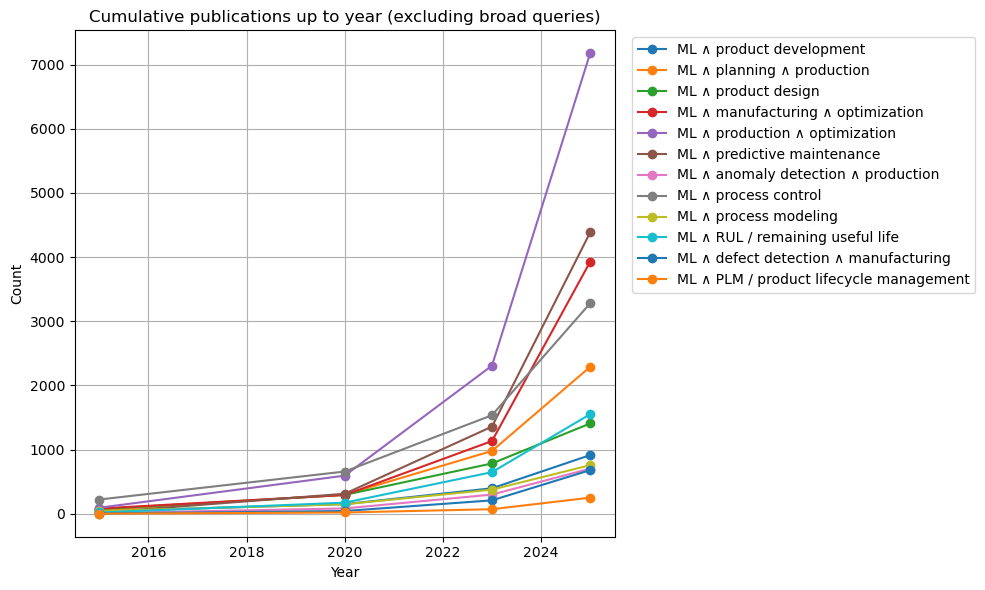

In [8]:
# Cell 3 (revised): Line plot (exclude the two broad queries)
mask_big = df["Query (exact)"].isin([
    'machine learning AND "manufacturing"',
    'machine learning AND "production"',
])
df_small = df.loc[~mask_big].copy()

years = [2015, 2020, 2023, 2025]  # cumulative cutoffs + total(now)
for _, r in df_small.iterrows():
    y = [r["<2015"], r["<2020"], r["<2023"], r["Total"]]
    plt.plot(years, y, marker="o", label=r["Query (short)"])
plt.title("Cumulative publications up to year (excluding broad queries)")
plt.xlabel("Year"); plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


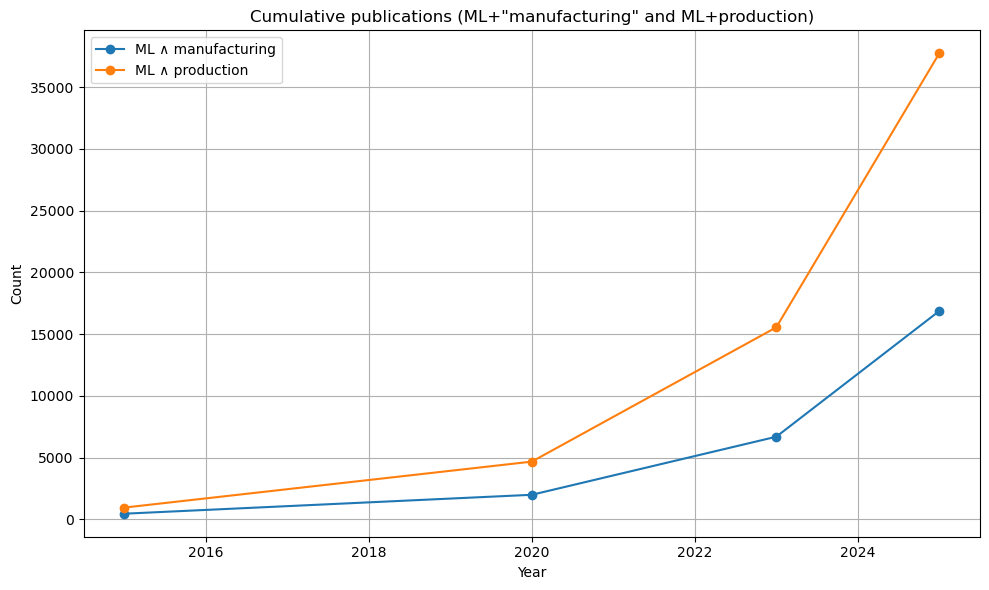

In [9]:
# Cell 3b (new): Line plot only for the two broad queries
df_big = df.loc[mask_big].copy()
years = [2015, 2020, 2023, 2025]
for _, r in df_big.iterrows():
    y = [r["<2015"], r["<2020"], r["<2023"], r["Total"]]
    plt.plot(years, y, marker="o", label=r["Query (short)"])
plt.title('Cumulative publications (ML+"manufacturing" and ML+production)')
plt.xlabel("Year"); plt.ylabel("Count")
plt.legend(); plt.tight_layout(); plt.show()


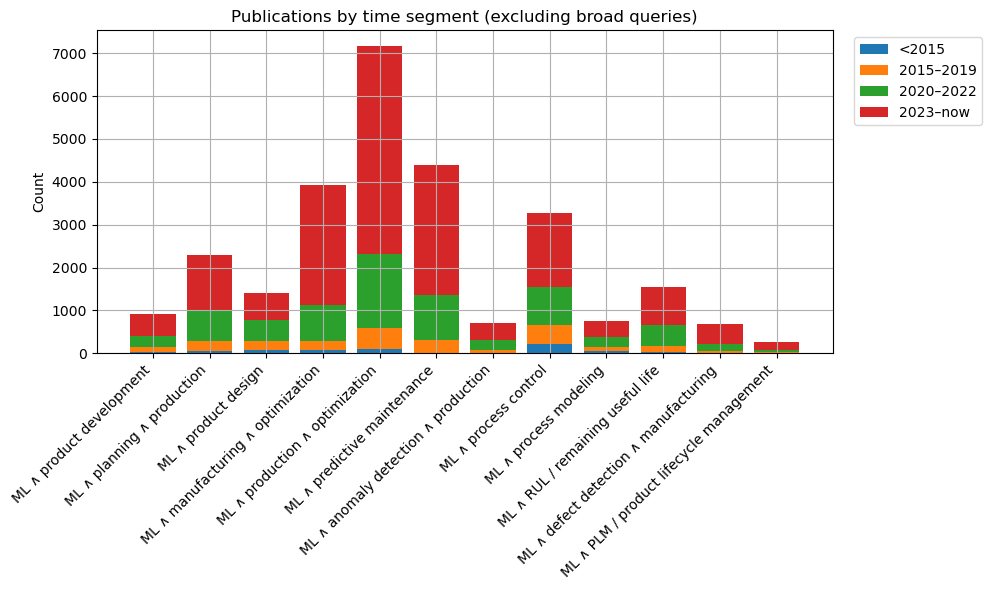

In [10]:
# Cell 4 (revised): Stacked bar by period (exclude the two broad queries)
segments = ["<2015", "2015–2019", "2020–2022", "2023–now"]
df_small = df.loc[~mask_big].copy()

bottom = [0] * len(df_small)
for seg in segments:
    plt.bar(df_small["Query (short)"], df_small[seg], bottom=bottom, label=seg)
    bottom = [a + b for a, b in zip(bottom, df_small[seg])]
plt.title("Publications by time segment (excluding broad queries)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


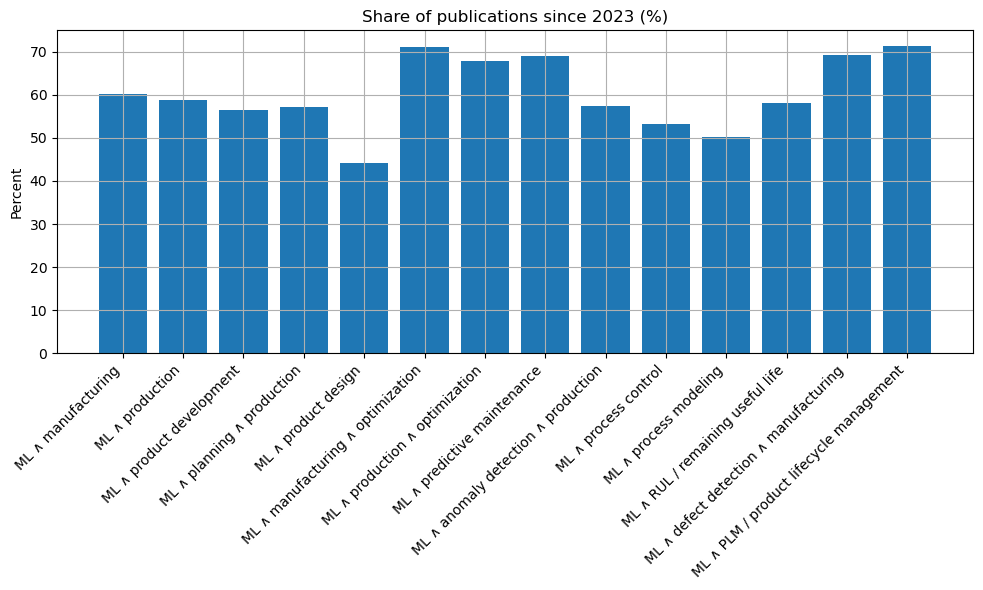

In [6]:
# Cell 5: Bar chart - share after 2023
plt.bar(df["Query (short)"], df["After 2023 (%)"])
plt.title("Share of publications since 2023 (%)")
plt.ylabel("Percent")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
